# Imports

In [1]:
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Read in the Training Image Paths

In [2]:
train_1_paths = open("train/images/1/train_OBJ/paths.txt").read().splitlines()
train_2_paths = open("train/images/2/train_OBJ/paths.txt").read().splitlines()
train_3_paths = open("train/images/3/train_OBJ/paths.txt").read().splitlines()
train_4_paths = open("train/images/4/train_OBJ/paths.txt").read().splitlines()
print(len(train_1_paths))
print(len(train_2_paths))
print(len(train_3_paths))
print(len(train_4_paths))

1566
773
8216
724


# Store the Training Labels

In [3]:
train_labels = []
for _ in train_1_paths:
    label = [1]
    train_labels.append(label)
for _ in train_2_paths:
    label = [2]
    train_labels.append(label)
for _ in train_3_paths:
    label = [3]
    train_labels.append(label)
for _ in train_4_paths:
    label = [4]
    train_labels.append(label)
train_labels = np.asarray(train_labels)
print(train_labels.shape)

(11279, 1)


# Read Training Data into np.array In Random Order

In [4]:
train_images = []
train_labels = []

# first element for padding, classes begin at 1
label_counts = [len(train_1_paths), len(train_2_paths), len(train_3_paths), len(train_4_paths)] 

total_labels = label_counts[0] + label_counts[1] + label_counts[2] + label_counts[3]

for i in range(total_labels):
    # Get random label that is still available
    while True:
        random_label = random.randint(1, 4)
        if (label_counts[random_label-1] > 0):
            label_counts[random_label-1] = label_counts[random_label-1] - 1 # decrement the label count
            break
    
    # append the label to the label list and add the corresponding image to the image list
    train_labels.append([random_label - 1]) 
    if random_label == 1:
        path = train_1_paths.pop(len(train_1_paths) - 1) # get the path at the end of the list
        image = imread(path)
        image = np.asarray(image, dtype=np.float64)
        train_images.append(image)
    elif random_label == 2:
        path = train_2_paths.pop(len(train_2_paths) - 1) # get the path at the end of the list
        image = imread(path)
        image = np.asarray(image, dtype=np.float64)
        train_images.append(image)
    elif random_label == 3:
        path = train_3_paths.pop(len(train_3_paths) - 1) # get the path at the end of the list
        image = imread(path)
        image = np.asarray(image, dtype=np.float64)
        train_images.append(image)
    elif random_label == 4:
        path = train_4_paths.pop(len(train_4_paths) - 1) # get the path at the end of the list
        image = imread(path)
        image = np.asarray(image, dtype=np.float64)
        train_images.append(image)
    else:
        print("Issue...")

train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
print(train_images.shape)
print(train_labels.shape)

(11279, 84, 84, 3)
(11279, 1)


# Break Off 1000 Random Images to Use as Test Data

In [5]:
(train_images, test_images) = np.split(train_images, [10000], 0)
(train_labels, test_labels) = np.split(train_labels, [10000], 0)

# further break up the test_images to keep back some secret data that is not used to train the model
(secret_images, test_images) = np.split(test_images, [abs(1000 - test_images.shape[0])], 0)
(secret_labels, test_labels) = np.split(test_labels, [abs(1000 - test_labels.shape[0])], 0)

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(secret_images.shape)
print(secret_labels.shape)

(10000, 84, 84, 3)
(10000, 1)
(1000, 84, 84, 3)
(1000, 1)
(279, 84, 84, 3)
(279, 1)


# Normalize the pixel values on [0,1]

In [6]:
train_images = train_images / 255
test_images = test_images / 255

In [7]:
secret_images = secret_images / 255

# Plot the first 25 Samples

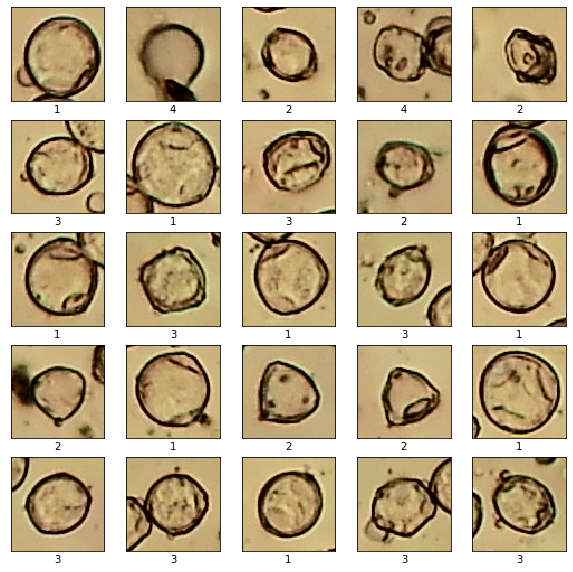

In [8]:
class_names = ['1', '2', '3', '4']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The pollen labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
model = models.Sequential() # Indeed a model that can be implemented as a CNN
model.add(layers.Conv2D(84, (3, 3), activation='relu', input_shape=(84, 84, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(168, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(168, (3, 3), activation='relu'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 82, 82, 84)        2352      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 84)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 168)       127176    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 168)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 168)       254184    
Total params: 383,712
Trainable params: 383,712
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
model.add(layers.Flatten()) # flatten the 3-D tensor output of the preceding layer into a
                            # 1-D vector to feed to the top Dense layers
model.add(layers.Dense(168, activation='relu'))
model.add(layers.Dense(4)) # final Dense layer has 10 neurons representing the 10 classes
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 82, 82, 84)        2352      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 84)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 168)       127176    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 168)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 168)       254184    
_________________________________________________________________
flatten (Flatten)            (None, 48552)             0         
_________________________________________________________________
dense (Dense)                (None, 168)               8

In [ ]:
# Train the Model (took about 12 minutes)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Train on 10000 samples, validate on 1000 samples
Epoch 1/2
 5792/10000 [================>.............] - ETA: 2:57 - loss: 0.7512 - accuracy: 0.7136

# Analyze Training

In [ ]:
# Evaluation results from model.evaluate()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
plt.figure(figsize=(5,5))

# play with this to see different images
# Note: Because of the way I broke the images up randomly, 
image_number = 2

image = np.array([secret_images[image_number]], dtype=np.float32)
label = class_names[int(secret_labels[image_number])]
print("label: " + label)
print("shape: " + str(image.shape))

# Do the prediction
prediction = model.predict(image, batch_size=1, verbose=1)
print("model predicted: " + class_names[np.argmax(prediction)])
print("ground truth label: " + label)
plt.imshow(image[0], cmap=plt.cm.binary)